# Experiment 1


---

## 1. Dataset Creation

> Prof Dino has major GI issues (I do), stemming from a gluten and a lactose allergy. Let's just say that if he eats something with gluten or drinks something with lactose, then next day(s) he has diarrhea. Create a dataset with breakfast, morning tea, lunch, afternoon tea, dinner, toilet. Each column is binary (T/F) values, and for breakfast, lunch, and dinner denotes whether or not I had gluten. For both tea columns, it's whether I had tea with milk. Toilet T means diarrhea. Create that dataset randomly as T/F values, for all columns. Make sure the label is balanced around T/F.

## 1.1 Generate Randomly Selected Data

To achieve this, I will outline the steps to create a balanced dataset with $43,800$ rows, equivalent to approximately $120$ years of data (All I wish Prof. Dino will live forever, but my RAM is small.):

1. Create a dataframe called df_daily with five columns: `Breakfast`, `Morning_Tea`, `Lunch`, `Afternoon_Tea`, and `Dinner`.

2. Add $21,900$ rows to df_daily where all values are set to $False$.

3. Add another $21,900$ rows to df_daily where the values in each column are randomly filled with $True$ or $False$.

4. Shuffle all the rows in `df_daily` randomly.

> https://datagy.io/pandas-shuffle-dataframe/

By following these steps, we can generate a balanced dataset that encompasses a substantial time span.

In [1]:
import pandas as pd
import numpy as np
# from sklearn.utils import shuffle

# Define the column names
cols = ['Breakfast', 'Morning_Tea', 'Lunch', 'Afternoon_Tea', 'Dinner', 'Toilet']

In [2]:
# Create a dataframe with all False rows
df_false = pd.DataFrame(np.full((21900, len(cols)), False), columns=cols)

In [3]:
# Create a dataframe with randomly assigned True/False rows
df_random = pd.DataFrame(np.random.choice([True, False], size=(21900, len(cols))), columns=cols)

In [4]:
# Concatenate the dataframes
df_daily = pd.concat([df_false, df_random])

In [5]:
count_all_false = (df_daily == False).all(axis=1).sum()
count_all_false

22578

In [6]:
# Shuffle the dataframe
df_daily = df_daily.sample(frac=1).reset_index()

## 1.2 Create Label 'Toilet'

After creating the dataframe `df_daily`, we can add a new column called `Toilet`. For each row $t$ in df_daily, we can set the value in the `Toilet` column of row $t+1$ based on the values in the `Breakfast`, `Morning_Tea`, `Lunch`, `Afternoon_Tea`, and `Dinner` columns.

In [7]:
# # Create a condition where all specified columns are False
# condition = (df_daily[['Breakfast', 'Morning_Tea', 'Lunch', 'Afternoon_Tea', 'Dinner']] == False).all(axis=1)

# # Shift the condition one row downwards (so that row t's condition affects row t+1)
# condition = condition.shift(1)

# # Use the condition to update 'Toilet' values. If condition is True, set 'Toilet' to False. If condition is False or NaN, set 'Toilet' to True.
# df_daily['Toilet'] = np.where(condition, False, True)


In this code, we use the **any()** function along with the **axis=1** argument to check if any value in the specified columns is $True$. We then use the **shift()** function with $-1$ as the shift parameter to shift the values by one row. Finally, we use the **fill_value=False** argument to replace any $NaN$ values resulting from the shift operation with $False$.

In [8]:
# df_daily = df_daily.drop('index', axis=1)

In [9]:
df_daily.shape

(43800, 6)

By following this approach, we have successfully obtained a dataset with $43,800$ rows and $6$ labels. To ensure the data's integrity, let's perform a sanity check to confirm that there are no $NaN$ values present.

---

## 1.3 Sanity Check

Here's the code snippet to perform the sanity check:

In [10]:
# Check for NaN values in the dataset
nan_values = df_daily.isnull().sum().sum()

if nan_values == 0:
    print("Sanity check passed: No NaN values detected in the dataset.")
else:
    print("Sanity check failed: NaN values detected in the dataset.")

Sanity check passed: No NaN values detected in the dataset.


Then, let's examine all the column names in the dataframe df_daily to get an overview of the available columns.

In [11]:
column_names = df_daily.columns.tolist()

print("Column names in the dataframe df_daily:")
print(column_names)

Column names in the dataframe df_daily:
['Breakfast', 'Morning_Tea', 'Lunch', 'Afternoon_Tea', 'Dinner', 'Toilet']


Next, let's examine the distribution of values in the `Toilet` column of the dataframe to assess the dataset's balance. This will provide insights into the proportion of `True` and `False` values in the dataset.

In [12]:
# Check the distribution of values in the 'Toilet' column
toilet_distribution = df_daily['Toilet'].value_counts()

print("Distribution of values in the 'Toilet' column:")
print(toilet_distribution)

Distribution of values in the 'Toilet' column:
False    22579
True     21221
Name: Toilet, dtype: int64


<AxesSubplot:xlabel='Toilet', ylabel='count'>

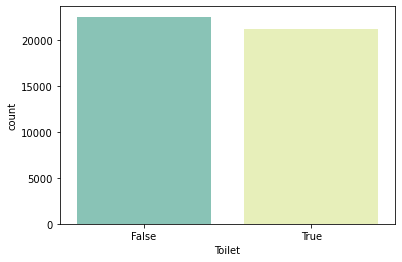

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualize the distribution of values in column 'Toilet'
sns.countplot(x = df_daily['Toilet'], palette=["#7fcdbb", "#edf8b1"])

Based on the distribution of values in the `Toilet` column as shown above, we can infer that the dataset is balanced. This conclusion is drawn from observing that there is a roughly equal number of $True$ and $False$ values in the column. With this confirmation, we can proceed to the next step: model creation.

---

# 2. Model Creation

To create a neural network model with two subnetworks based on the dataframe `df_daily`, where each subnetwork predicts the value in the `Toilet` column for the next row, and split the data into training, validation, and testing sets, we are following these steps:

1. Split the dataframe into features (input) and labels (output), shift the labels by 1.

2. Determine the indices for splitting the data into training, validation, and testing sets based on the provided percentages.

3. Create the gluten subnetwork using the `Breakfast`, `Lunch`, and `Dinner` columns.

4. Create the lactose subnetwork using the `Morning_Tea` and `Afternoon_Tea` columns.

5. Concatenate the output of the subnetworks.

6. Add a one-neuron dense layer to the concatenated output for the final prediction of the `Toilet` label.

7. Compile the model with an appropriate loss function and optimizer.

8. Train the model using the training set and validate using the validation set.

9. Evaluate the model's performance using the testing set.

In [14]:
df_daily = df_daily.astype(int)

In [15]:
# Split the dataframe into features (input) and labels (output)
features = df_daily[['Breakfast', 'Lunch', 'Dinner', 'Morning_Tea', 'Afternoon_Tea']][0:21900*2 - 1]
labels = df_daily['Toilet'][1:]

Perform an inspection to check the number of rows in the feature and label dataframes and verify if they have the same length. Doing this will display the number of rows in the features and labels dataframes. It will also indicate whether the two dataframes have the same length or not.

In [16]:
num_features_rows = len(features)
num_labels_rows = len(labels)

print("Number of rows in features dataframe:", num_features_rows)
print("Number of rows in labels dataframe:", num_labels_rows)

if num_features_rows == num_labels_rows:
    print("The feature and label dataframes have the same length.")
else:
    print("The feature and label dataframes do not have the same length.")


Number of rows in features dataframe: 43799
Number of rows in labels dataframe: 43799
The feature and label dataframes have the same length.


In [17]:
fea_copy = features.copy()
lab_copy = labels.copy()

fea_copy = fea_copy.reset_index(drop=True)
lab_copy = lab_copy.reset_index(drop=True)

df_combo = pd.concat([fea_copy, lab_copy], axis=1)


df_combo.shape

(43799, 6)

In [18]:
df_unique_list = df_combo.drop_duplicates()
df_unique_list.shape

(32, 6)

In [19]:
print(df_unique_list)

     Breakfast  Lunch  Dinner  Morning_Tea  Afternoon_Tea  Toilet
0            0      0       0            1              1       1
1            0      0       1            0              0       1
2            0      1       1            0              0       1
3            1      0       1            1              1       1
4            0      0       0            0              0       0
9            1      0       0            1              1       1
17           1      1       1            0              0       1
20           1      1       0            1              0       1
21           1      1       0            0              1       1
22           0      1       1            1              0       1
24           0      1       0            1              1       1
33           1      0       1            1              0       1
35           0      0       1            1              1       1
37           0      1       0            0              0       1
38        

In [20]:
# Determine the indices for splitting the data
train_size = int(len(df_daily) * 0.8)
val_size = int(len(df_daily) * 0.1)
test_size = len(df_daily) - train_size - val_size

We first split the dataframe into features and labels. Then, we use the train_test_split() function from scikit-learn to split the data into training, validation, and testing sets based on the provided percentages.

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [22]:
# Split the data into training, validation, and testing sets
train_features = features.iloc[:train_size]
val_features = features.iloc[train_size:train_size+val_size]
test_features = features.iloc[-test_size:]

train_labels = labels.iloc[:train_size]
val_labels = labels.iloc[train_size:train_size+val_size]
test_labels = labels.iloc[-test_size:]

Next, we create the gluten and lactose subnetworks using the dense layers. The output of these subnetworks is concatenated, and a final prediction layer is added. The model is then compiled with the appropriate loss function and optimizer.

In [23]:
# Create the gluten subnetwork
gluten_input = Input(shape=(3,))
gluten_dense1 = Dense(64, activation='selu')(gluten_input)
gluten_dense2 = Dense(32, activation='selu')(gluten_dense1)
# gluten_output = Dense(1, activation='sigmoid')(gluten_dense2)
gluten_output = Dense(1, activation='selu')(gluten_dense2)

In [24]:
# Create the lactose subnetwork
lactose_input = Input(shape=(2,))
lactose_dense1 = Dense(64, activation='selu')(lactose_input)
lactose_dense2 = Dense(32, activation='selu')(lactose_dense1)
# lactose_output = Dense(1, activation='sigmoid')(lactose_dense2)
lactose_output = Dense(1, activation='selu')(lactose_dense2)

In [25]:
# Concatenate the output of the subnetworks
concatenated = concatenate([gluten_output, lactose_output])

In [26]:
# Build the final prediction layer
prediction = Dense(1, activation='sigmoid')(concatenated)

In [27]:
# Build the final prediction layer
prediction = Dense(1, activation='sigmoid')(concatenated)

In [28]:
# Create the model
model = Model(inputs=[gluten_input, lactose_input], outputs=prediction)

The `Adam` optimizer is used with the specified learning rate of $0.001$. The optimizer is then passed to the **compile()** function to set the learning rate of the model.

In [29]:
# Set the learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [30]:
# Compile the model with the specified learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Let's then display a summary of the model's structure, including the number of parameters in each layer and the total number of trainable parameters.

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           256         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 64)           192         ['input_2[0][0]']                
                                                                                              

In [32]:
for layer in model.layers:
        print("Layer Name: " + layer.name)
        print("Type of layer: " + layer.__class__.__name__)
        print("Input dimesion: {}".format(layer.input_shape[1:]))
        print("Output dimesion: {}".format(layer.output_shape[1:]))
        print("Parameter Count: {}".format( layer.count_params()))
        try:
            print("Activation : " + layer.activation.__name__)
            print(" ")
        except:
            print(" ")

Layer Name: input_1
Type of layer: InputLayer
Input dimesion: []
Output dimesion: []
Parameter Count: 0
 
Layer Name: input_2
Type of layer: InputLayer
Input dimesion: []
Output dimesion: []
Parameter Count: 0
 
Layer Name: dense
Type of layer: Dense
Input dimesion: (3,)
Output dimesion: (64,)
Parameter Count: 256
Activation : selu
 
Layer Name: dense_3
Type of layer: Dense
Input dimesion: (2,)
Output dimesion: (64,)
Parameter Count: 192
Activation : selu
 
Layer Name: dense_1
Type of layer: Dense
Input dimesion: (64,)
Output dimesion: (32,)
Parameter Count: 2080
Activation : selu
 
Layer Name: dense_4
Type of layer: Dense
Input dimesion: (64,)
Output dimesion: (32,)
Parameter Count: 2080
Activation : selu
 
Layer Name: dense_2
Type of layer: Dense
Input dimesion: (32,)
Output dimesion: (1,)
Parameter Count: 33
Activation : selu
 
Layer Name: dense_5
Type of layer: Dense
Input dimesion: (32,)
Output dimesion: (1,)
Parameter Count: 33
Activation : selu
 
Layer Name: concatenate
Type of 

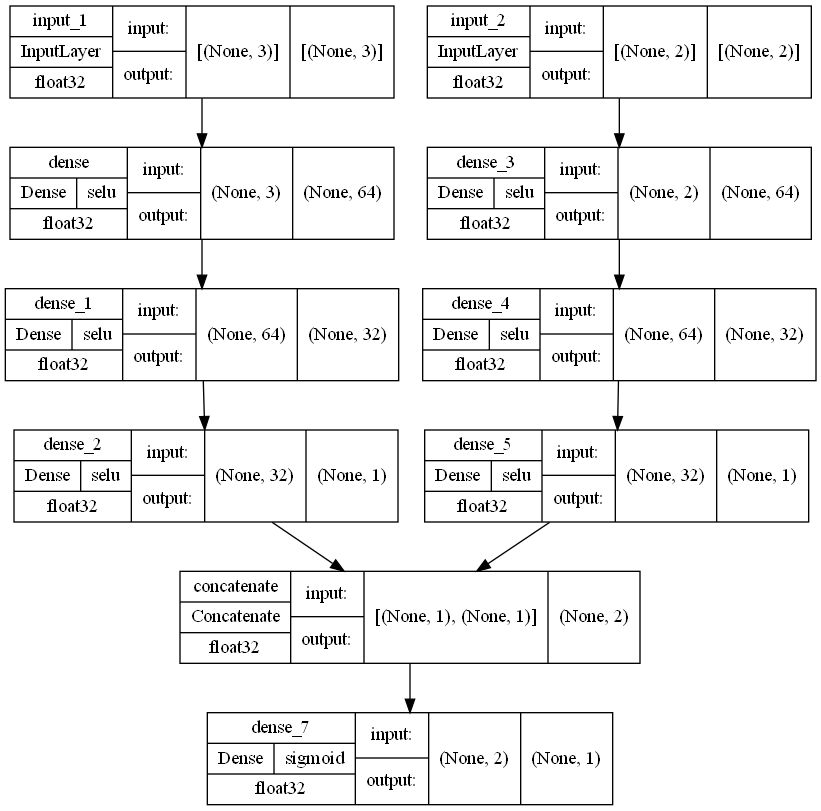

In [33]:
model_img_file = 'exp1_model.png'
plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

By setting the epochs parameter to $20$, the model will iterate over the training data $20$ times during the training process. The `batch_size` parameter is set to $32$, which means that the model will update its weights after processing each batch of $32$ samples.

In [34]:
history = model.fit(
    [train_features[['Breakfast', 'Lunch', 'Dinner']], train_features[['Morning_Tea', 'Afternoon_Tea']]],
    train_labels,
    validation_data=([val_features[['Breakfast', 'Lunch', 'Dinner']], val_features[['Morning_Tea', 'Afternoon_Tea']]], val_labels),
    epochs=20,
    batch_size=32
)

Epoch 1/20
1095/1095 [==============================] - 4s 2ms/step - loss: 0.0678 - accuracy: 0.9973 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 2/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 3/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 4/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 5/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 6/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 7/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy:

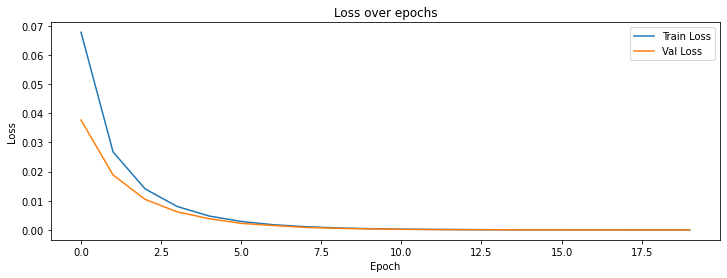

In [35]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

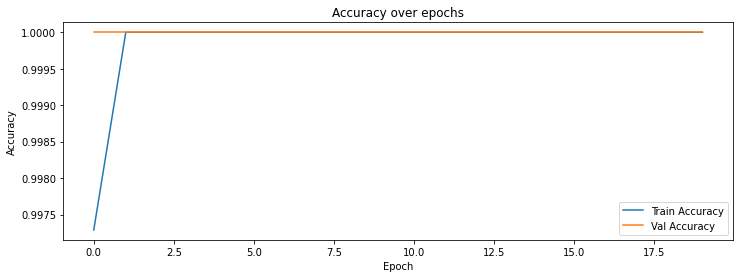

In [36]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

In [37]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(
    [test_features[['Breakfast', 'Lunch', 'Dinner']], test_features[['Morning_Tea', 'Afternoon_Tea']]],
    test_labels
)

137/137 [==============================] - 0s 1ms/step - loss: 3.1441e-06 - accuracy: 1.0000
